# Assignment 3 - D30


## The wine retailer we studied in Lecture 2 still needs to find the stores that may have an irregular accounting. However, the store updated its data and included one additional store, possibly adding more errors. Solve the questions below to help address their managerial challenges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Read the input file 'StoreBalanceUpdated.csv' from the Assignment 3 page at Quercus and print the first five lines. Afterwards, print the descriptive statistics (0.10 pts)

In [2]:
dfStoreBalance = pd.read_csv('StoreBalanceUpdated.csv', header=0)
dfStoreBalance.head(5)

,Store ID,Store Name,Wine ID,Wine Title,Wine Variety,Units Sold,Gross Margin,Inventory,price,costofgood
0,0,Yonge and Dundas,101735,Pianetta 2012 Sangiovese (Paso Robles),Sangiovese,606.0,9980.82,25,34.0,17.53
1,0,Yonge and Dundas,75479,Heron Hill 2010 Cabernet Franc (Finger Lakes),Cabernet Franc,1220.0,8967.00,12,15.0,7.65
2,0,Yonge and Dundas,68055,Wines & Winemakers 2015 Companhia das Lezírias...,Sauvignon Blanc,872.0,15111.76,4,23.0,5.67
3,0,Yonge and Dundas,123789,Domaine Christian Moreau Père et Fils 2013 Vai...,Chardonnay,101.0,3046.16,6,65.0,34.84
4,0,Yonge and Dundas,44423,Tamarack Cellars 2014 Cabernet Franc (Wahluke ...,Cabernet Franc,481.0,8167.38,7,30.0,13.02


In [3]:
dfStoreBalance.describe()

,Store ID,Wine ID,Units Sold,Gross Margin,price,costofgood
count,2697.000000,2697.000000,2695.000000,2693.000000,2692.000000,2693.000000
mean,2.826845,65026.540971,711.785158,9810.659736,35.099183,14.028136
std,2.029652,37121.921831,441.702803,3599.989814,33.434876,16.028650
min,0.000000,15.000000,8.000000,345.920000,5.000000,1.600000
25%,1.000000,32925.000000,386.000000,7577.600000,18.000000,6.450000
50%,2.000000,64219.000000,634.000000,9503.700000,25.000000,10.320000
75%,4.000000,97288.000000,949.000000,11899.860000,43.000000,17.230000
max,7.000000,129954.000000,3378.000000,44405.520000,800.000000,465.390000


## 2. Check and fix any issues with the column labels (0.10 pts)

In [4]:
dfStoreBalance.columns

Index(['Store ID', 'Store Name', 'Wine ID', 'Wine Title', 'Wine Variety',
       'Units Sold', 'Gross Margin', 'Inventory', 'price', 'costofgood'],
      dtype='object')

In [5]:
columndict = {'costofgood': 'COGS', 'price': 'Price', 'Units Sold': 'Units Sold'}
dfStoreBalance.rename(columns = columndict, inplace = True)

In [6]:
dfStoreBalance.columns

Index(['Store ID', 'Store Name', 'Wine ID', 'Wine Title', 'Wine Variety',
       'Units Sold', 'Gross Margin', 'Inventory', 'Price', 'COGS'],
      dtype='object')

## 3. Identify if the data has any columns with missing fields. If so, show how many missing fields there are in each column (0.20 pts)

In [7]:
dfStoreBalance.isnull().sum()

Store ID        0
Store Name      0
Wine ID         0
Wine Title      2
Wine Variety    0
Units Sold      2
Gross Margin    4
Inventory       6
Price           5
COGS            4
dtype: int64

## 4. If necessary, replace the missing data by applying an appropriate technique (either deletion or imputation). Justify your answer in your comments.  (0.25 pts)

In [8]:
dfStores = dfStoreBalance.fillna({'Wine Title': 0, 'Units Sold': 0 , 'Gross Margin': 0, 'Price':0, 'COGS':0})

In [9]:
#Perserve the average and not the standard deviation
meanunit = dfStores['Gross Margin'].mean()
dfStore = dfStores.fillna({'Gross Margin':meanunit})
dfStore.describe()

,Store ID,Wine ID,Units Sold,Gross Margin,Price,COGS
count,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000
mean,2.826845,65026.540971,711.257323,9796.109258,35.034112,14.007330
std,2.029652,37121.921831,441.964023,3617.082972,33.437976,16.025853
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,32925.000000,385.000000,7569.620000,18.000000,6.450000
50%,2.000000,64219.000000,634.000000,9500.760000,25.000000,10.310000
75%,4.000000,97288.000000,949.000000,11899.200000,43.000000,17.210000
max,7.000000,129954.000000,3378.000000,44405.520000,800.000000,465.390000


## 5. Check if the column data types are consistent and fix them if necessary. (0.25 pts)

In [10]:
dfStore.dtypes

Store ID          int64
Store Name       object
Wine ID           int64
Wine Title       object
Wine Variety     object
Units Sold      float64
Gross Margin    float64
Inventory        object
Price           float64
COGS            float64
dtype: object

In [11]:
#Change the Units Sold to an int
dfStore['Units Sold'] = dfStore['Units Sold'].astype(int)
dfStore.head(1)

,Store ID,Store Name,Wine ID,Wine Title,Wine Variety,Units Sold,Gross Margin,Inventory,Price,COGS
0,0,Yonge and Dundas,101735,Pianetta 2012 Sangiovese (Paso Robles),Sangiovese,606,9980.82,25,34.0,17.53


In [12]:
#Inventory has some strings
dfStore['Inventory'].unique()

array(['25', '12', '4', '6', '7', '19', '11', '14', '24', '23', '5', '22',
       '13', '18', '8', '9', '0', '15', '17', '20', '2', '10', '16', '1',
       '3', '21', 'Did not check', nan, 'Still verifying',
       'Shelf is broken'], dtype=object)

In [13]:
#Check these rows
strings = ['Did not check', 'nan', 'Still verifying', 'Shelf is broken']
dfStore[dfStore['Inventory'].isin(strings)]

,Store ID,Store Name,Wine ID,Wine Title,Wine Variety,Units Sold,Gross Margin,Inventory,Price,COGS
128,0,Yonge and Dundas,76321,Recanati 2006 Yasmin Red Kosher Red (Galilee),Red Blend,1468,7398.72,Did not check,10.0,4.96
433,1,Davenport,35712,José Maria da Fonseca 2014 Periquita Reserva R...,Portuguese Red,997,10229.22,Still verifying,16.0,5.74
569,1,Davenport,123386,Covila 2007 II Reserva (Rioja),Tempranillo,898,7956.28,Shelf is broken,22.0,13.14


In [14]:
dfStore['Inventory'] = pd.to_numeric(dfStore['Inventory'], errors = 'coerce')
dfStore.describe()

,Store ID,Wine ID,Units Sold,Gross Margin,Inventory,Price,COGS
count,2697.000000,2697.000000,2697.000000,2697.000000,2688.000000,2697.000000,2697.000000
mean,2.826845,65026.540971,711.257323,9796.109258,12.438616,35.034112,14.007330
std,2.029652,37121.921831,441.964023,3617.082972,7.556852,33.437976,16.025853
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,32925.000000,385.000000,7569.620000,6.000000,18.000000,6.450000
50%,2.000000,64219.000000,634.000000,9500.760000,13.000000,25.000000,10.310000
75%,4.000000,97288.000000,949.000000,11899.200000,19.000000,43.000000,17.210000
max,7.000000,129954.000000,3378.000000,44405.520000,25.000000,800.000000,465.390000


## 6. Create a new column with the expected gross marging of each product (0.10pts)

In [15]:
dfStore['Expected Gross Margin'] = (dfStore['Price'] - dfStore['COGS']) * dfStore['Units Sold']
dfStore.describe()

,Store ID,Wine ID,Units Sold,Gross Margin,Inventory,Price,COGS,Expected Gross Margin
count,2697.000000,2697.000000,2697.000000,2697.000000,2688.000000,2697.000000,2697.000000,2697.000000
mean,2.826845,65026.540971,711.257323,9796.109258,12.438616,35.034112,14.007330,9893.193459
std,2.029652,37121.921831,441.964023,3617.082972,7.556852,33.437976,16.025853,3608.029360
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9539.520000
25%,1.000000,32925.000000,385.000000,7569.620000,6.000000,18.000000,6.450000,7680.940000
50%,2.000000,64219.000000,634.000000,9500.760000,13.000000,25.000000,10.310000,9605.640000
75%,4.000000,97288.000000,949.000000,11899.200000,19.000000,43.000000,17.210000,11936.960000
max,7.000000,129954.000000,3378.000000,44405.520000,25.000000,800.000000,465.390000,44405.520000


## 7. Create a bar plot depicting the difference between the expected and real sum of gross margins per store. That is, your plot must have one bar per store, and the y-axis of each bar must correspond to the difference between the real and expected sum of gross margins over all the products at the associated store. Which stores may have an irregular accounting? (0.5pts)

In [16]:
dfWine = dfStore.groupby('Store ID').sum()
dfWine

,Wine ID,Units Sold,Gross Margin,Inventory,Price,COGS,Expected Gross Margin
Store ID,,,,,,,
0,25329843,280426,3842810.52,5030.0,13260.0,5378.15,3842810.52
1,32381417,339287,4896058.32,5871.0,17088.0,6446.40,4896058.32
2,32510699,346313,4872794.54,5903.0,16735.0,6661.22,4872794.54
3,18032705,202544,2443307.75,3581.0,9821.0,4097.36,2741439.55
4,25641901,297275,4142422.08,5091.0,14019.0,5530.79,4142422.08
5,13612377,150975,2044565.71,2602.0,8385.0,3582.80,2019616.70
6,26271950,283184,3913538.96,5108.0,14430.0,5814.47,3923674.26
7,1595689,18257,264608.79,249.0,749.0,266.58,243126.79


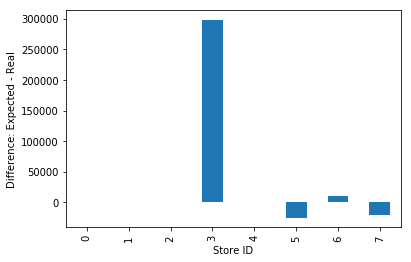

In [17]:
dfWine['Difference'] = dfWine['Expected Gross Margin'] - dfWine['Gross Margin']

dfWine['Difference'].plot.bar()
plt.xlabel('Store ID')
plt.ylabel('Difference: Expected - Real')
plt.show()

## 8. For the irregular stores in Q7, calculate the total number of products with irregular gross margins and by how much (in percentage) the expected and real gross margins do not match. Argue whether these numbers are high enough to justify auditing the store (0.5pts)

In [18]:
#Store ID # 3 has the most irregular products
dfStoreIssue =  dfStore[dfStore['Store ID'] ==3]
dfStoreIssue.head(5)

,Store ID,Store Name,Wine ID,Wine Title,Wine Variety,Units Sold,Gross Margin,Inventory,Price,COGS,Expected Gross Margin
1361,3,Royal Bank Plaza,24091,Monteviejo 2012 Petite Fleur Malbec (Uco Valley),Malbec,635,11004.55,13.0,25.0,7.67,11004.55
1362,3,Royal Bank Plaza,38387,Château Fonfroide 2013 Bordeaux,Bordeaux-style Red Blend,1491,7887.39,4.0,12.0,6.71,7887.39
1363,3,Royal Bank Plaza,103638,La Playa 2011 Axel Syrah (Limarí Valley),Syrah,893,5892.00,25.0,17.0,3.78,11805.46
1364,3,Royal Bank Plaza,43615,Viniverde 2015 Alto Lima Rosé (Vinho Verde),Rosé,1783,10591.02,16.0,10.0,4.06,10591.02
1365,3,Royal Bank Plaza,73277,Marco Porello 2007 Torretta (Roero),Nebbiolo,1261,12963.08,24.0,15.0,4.72,12963.08


In [19]:
#Considering the absolute value greater than 1

dfProduct = dfStoreIssue[abs(dfStoreIssue['Expected Gross Margin'] - dfStoreIssue['Gross Margin']) > 1]
dfProduct.head(5)

,Store ID,Store Name,Wine ID,Wine Title,Wine Variety,Units Sold,Gross Margin,Inventory,Price,COGS,Expected Gross Margin
1363,3,Royal Bank Plaza,103638,La Playa 2011 Axel Syrah (Limarí Valley),Syrah,893,5892.00,25.0,17.0,3.78,11805.46
1377,3,Royal Bank Plaza,5473,Round Pond 2012 Estate Sauvignon Blanc (Ruther...,Sauvignon Blanc,523,3376.55,19.0,24.0,13.07,5716.39
1378,3,Royal Bank Plaza,117709,Keller Estate 2009 Oro de Plata Chardonnay (So...,Chardonnay,675,5878.94,3.0,33.0,18.29,9929.25
1383,3,Royal Bank Plaza,39639,Davis Family 2013 Soul Patch Estate Grown Syra...,Syrah,584,4646.31,21.0,42.0,24.64,10138.24
1384,3,Royal Bank Plaza,125985,Origin 2014 Johan Vineyard Pinot Noir (Willame...,Pinot Noir,393,5932.49,16.0,60.0,26.84,13031.88


In [20]:
dfProduct['Percent Diff'] = 100 * (dfProduct['Expected Gross Margin'] - dfProduct['Gross Margin'])/dfProduct['Expected Gross Margin']
dfProduct.describe()['Percent Diff']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    64.000000
mean     50.237045
std       6.245805
min      40.266471
25%      45.662308
50%      50.109178
75%      56.137210
max      59.941717
Name: Percent Diff, dtype: float64

Therefore since the percentage difference is greater than 50% that means we should definitely investigate the situation.